In [1]:
#from service.client import BertClient
from numpy import dot
from numpy.linalg import norm
import os
import gensim
from lxml import objectify
import subprocess
import sent2vec
import numpy as np
import sys

#requires : sentence embedding model(.bin), xml folder.
model = sent2vec.Sent2vecModel()
model_dir = '/root/shared_data/model/'
model_name = 'my_model_lr5_ngram1_epch11.bin'
#model_name = 'my_model.bin'

model.load_model(model_dir+model_name)


in_dir = sys.argv[1]
xmlpath = '/root/shared_data/lee_cut_filt_xml/'
in_dir = xmlpath

out_dir = '/root/shared_data/embedding/'
if not os.path.exists(out_dir):
  os.makedirs(out_dir)

#bert 
'''
bc = BertClient(ip='172.17.0.2')
test_res = bc.encode(['안녕하세욥 이것은 예시 문장입니다.'])
num_word = len(episodes)
vec_size= len(test_res[0])
print('vec_size ' +str(vec_size))
out_dir = '../gitdir/bert_embed/'
'''

#takes in [xml] file, outputs .vec
#out_dir += 'bert_small.txt'
print('model load done')

model load done


In [2]:
# Reads xml file and generating .vec file (gensim format) _
vec_file_name = 'fast_sent.vec'
num_word = 0
vec_size = 700

#for bert usage.
'''
for i in episodes:
    f = open(in_dir+str(i))
    print(str(i) +' ', end='')
    xml_string = f.read()
    root = objectify.fromstring(xml_string)
    q_str = str(root['object']['name']).replace('\t','').replace('\n','')
    #q_str += ' '
    #q_str = (q_str +' ')*15
    print(q_str)
    st_vec = bc.encode([q_str])
    ff.write(str(i) +' ')
    for e in st_vec[0]:
        ff.write(str(e) + ' ')
    ff.write('\n')
'''

episodes = os.listdir(in_dir)

# read tags from xml file. counting non zero vector results.
for episode in episodes:
  xmls = os.listdir(in_dir + episode)
  for i in xmls:
    f = open(in_dir+episode+'/'+str(i))
    xml_string = f.read()
    if not xml_string:
      continue
    root = objectify.fromstring(xml_string)
    q_str = str(root['object']['name']).replace('\t','').replace('\n','').replace(',','').replace('!','').replace('?','')
    if q_str:
      emb = model.embed_sentence(q_str)    
      if(np.any(emb)):
        num_word+=1
    f.close()

# writing to .vec file.
ff = open(out_dir+vec_file_name, 'w')
ff.write(str(num_word)+' '+str(vec_size) +'\n')

for episode in episodes:
  xmls = os.listdir(in_dir+episode)
  for i in xmls:
    f = open(in_dir+episode+'/'+str(i))
    xml_string = f.read()
    if not xml_string:
      continue
    root = objectify.fromstring(xml_string)
    q_str = str(root['object']['name']).replace('\t','').replace('\n','').replace(',','').replace('!','').replace('?','')
    if q_str:
      emb = model.embed_sentence(q_str)
      if(np.any(emb)):
        ff.write(str(i) +' ')
        for e in emb[0]:
          ff.write(str(e) + ' ')
        ff.write('\n')
        print(str(i) + ' ' + str(q_str))    
    f.close()
ff.close()
print('writing .vec done')
#run(['cat',out_dir+'q_line.txt','|', '/home/sngjuk/fast_model/fastText-0.1.0/fasttext', 'print-sentence-vectors', '/home/sngjuk/fast_model/cc.ko.300.bin', '>', out_dir+'fast_default.txt'])
#p = run(['cat', out_dir+'q_line.txt'], stdout=PIPE, input=inword.encode('utf8'))
#res =p.stdout    

131화_구취단속_대작전_中-020.xml 당신 주둥이는 당신이 생각하는 것보다 훨씬 엄청난존재입니다 
131화_구취단속_대작전_中-033.xml 그렇게 괄약근 강화 지옥훈련은 계속됐다. 가삭 방귀로 송판깨기 
131화_구취단속_대작전_中-032.xml 드 음 을 하기 위한 최적의 장소인 폭포수계곡 항문을 개방해 기를 발산하는 겁니다 
131화_구취단속_대작전_中-030.xml 두 원 원 
131화_구취단속_대작전_中-007.xml 당신의 입은 이미 지독한 악취가 짜들대로 찌들어 서 갱생이 불가능합니다 쓰레기로 치면 재활용 할 수 없는 타는쓰레기지요. 
131화_구취단속_대작전_中-017.xml 왜 왜때려 
131화_구취단속_대작전_中-011.xml 똥구멍으로 말을 한다면 
131화_구취단속_대작전_中-026.xml 그렇게 그분 항문으로말하는 법을 터득하기 위한 험난한 수행 길에 올랐다. 
131화_구취단속_대작전_中-022.xml 재수없게 입냄새가지고 로맨스영화 남자주인공처럼 말하지마 
131화_구취단속_대작전_中-034.xml 궁둥이 캐치볼 나이스 캐치 
131화_구취단속_대작전_中-029.xml  잠깐상식 케겔운동이란 일명 항문조이기 운동 미국의 산부인과 전문의 아놀드 케겔 박사가 고안한 운동으로써 괄약 근을 단련하여 생식기 배설기의 강화와 배뇨문제나 발기부전 개선에 효과가 있다고 한다. 
131화_구취단속_대작전_中-001.xml 방법이 아주 없는 건 아닙니다 
131화_구취단속_대작전_中-010.xml 그 점을활용 
131화_구취단속_대작전_中-008.xml 오히려 당신의 입보다 똥구멍이 더 깨끗한 지경에 이르렀습니다 
131화_구취단속_대작전_中-005.xml 대 대체 어떤 방법입니까 
131화_구취단속_대작전_中-003.xml 다만 본인의 노력이 엄청나게 요구되는데 가능하시 겠습니까 기이 
131화_구취단속_대작전_中-015.xml 에라이 이 미친 양반아 입이 안된다면 귓구멍도 있고 콧구멍도 있는데 왜 하필 똥구멍까지 멀리가는 거요 
131화_구취

99화_격돌!_천하제일_미인대회_下-035.xml  미인감별 인간문화재 감탕식 영감 
99화_격돌!_천하제일_미인대회_下-009.xml 또간 그렇군.. 죄다 똑같으니 평가를 디테일하게 들어갈수밖에없는거야.. 
99화_격돌!_천하제일_미인대회_下-027.xml 전 재산다부었는데 여기서 떨어지면 나는 노상거지 알거지 되는겨. 기구한 사연 말해봤자 별 수 있나 불량품이면 불량품답게 불합격 이지   
99화_격돌!_천하제일_미인대회_下-028.xml 아니 시 력을 빼앗으면 되수으 
99화_격돌!_천하제일_미인대회_下-034.xml 아니 당신은  
99화_격돌!_천하제일_미인대회_下-036.xml 내가 애초에 이런 식의 미인대회는 반대했지 않느냐 이런 겉모습 측정으로 진정한 미인을 가려낼 수 있을 거라고 생각했나 
99화_격돌!_천하제일_미인대회_下-018.xml 아무리 봐도 결점을 못찾겠어. 완벽한 대칭이야 
99화_격돌!_천하제일_미인대회_下-004.xml 천하제일 미인희 과 어떤이인 심사 시 심장이 못생겼잖아 불합격 . 융털 정리는 한거야안한거야 불합격 껄껄껄 바로 이거야 혹시나십이자장 보톡스 맞고 왔는데 다행이다 간좀 깎고 올 걸 
99화_격돌!_천하제일_미인대회_下-029.xml 드디어 미쳤구만 
99화_격돌!_천하제일_미인대회_下-015.xml 그래도 그렇지. 년대 대우 탱크주의도 아니고 무슨 불량품 체크하냐 간격 석 눈이 짝짝이잖아 불합격 
99화_격돌!_천하제일_미인대회_下-033.xml 그럼 기억을 못하게 만들어야겠군. 히이익 뭣들 하는거냐 
99화_격돌!_천하제일_미인대회_下-019.xml 전재산을 쏟아부었다고. 흔한 양산형 미인과는 다르지 암.  
99화_격돌!_천하제일_미인대회_下-032.xml 우리의 시력을 빼앗는다고 기억마저 없어 지는 줄 아는개 불합격 용 써봤자 번 불합겨어억 넌 불합격이야 너부하 
99화_격돌!_천하제일_미인대회_下-003.xml 저.. 저거  
137화_이말년씨리즈_최후의_날_中-023.xml 남은 것은 사이버수사대의 공명

133화_자르기_마스터-017.xml 맛뵈기만 보여주겠네. 챠 캬 
133화_자르기_마스터-023.xml 에잇 
133화_자르기_마스터-032.xml 거기 경찰서죠 여기 승려가고기 먹고 있습니다 희센타 
133화_자르기_마스터-028.xml 아걍 아무거나 회 주세요. 
133화_자르기_마스터-024.xml 자네 어디가나 모 쌩쌩 
133화_자르기_마스터-015.xml 나는 소드마스터 검성이네 자네에겐 다른 사람과 다른 기가 느껴져  아 저 제사 안 지낼거예요 조상신도 안모심 
133화_자르기_마스터-037.xml 역시 내가 점 찍은 사내야. 자르는데 엄청난소질이 있다 상대방이 모으는 패를 모조리 잘라내고 있어. 
133화_자르기_마스터-039.xml  자르는데 소질이 너무 넘쳐서 자기 손까지 자를줄이야.. 
133화_자르기_마스터-003.xml 나는 검에 통달한 천하의 달인 바등 바들 
133화_자르기_마스터-009.xml 아 지루해. 라도 가져올 걸 어째 쓸만한놈이 안 보이냐 라 . 아 
133화_자르기_마스터-022.xml 호랑이에게 물려가도 정신만 바짝 차리면 산다 바짝 차리자. 
133화_자르기_마스터-031.xml 의 길 
133화_자르기_마스터-005.xml  평생을 수련하여 검에 대한 모든 것을 깨우쳤지만 
133화_자르기_마스터-012.xml 저놈이다 저놈이야 한눈에 알아볼 수 있어 저 놈에겐 뭔가를 자르는데 소질이 덕지덕지 달라붙어있어 다다 다 바일 .. 
133화_자르기_마스터-007.xml 이제 내 수명이 얼마 남지 않은 것을 깨닫고 네 노인네라 보험가입이 안된다고요 
133화_자르기_마스터-029.xml 세상에 아무리 말세라지만 스님이 고기를 먹다니 .. 
133화_자르기_마스터-034.xml  이렇게 된 이상 . 불법도박 하러간다 
133화_자르기_마스터-025.xml 외길 회센타 박밖 사 
133화_자르기_마스터-038.xml 동작그만 밑장빼기냐 .. . 
133화_자르기_마스터-013.xml 저기요 
133화_자르기_마스터-010.x

1화_밀덕을위한나라는없다-074.xml 밀덕으로 태어나 지금 죽어도 여한이 없다 저걸 실물로 보다니 
1화_밀덕을위한나라는없다-045.xml 교수님을 저격한다. 
1화_밀덕을위한나라는없다-034.xml 오늘 널 쓰러트리고 내가 우리과 최고의 밀덕에 등극한다. 
1화_밀덕을위한나라는없다-048.xml 걱정마. 이 총은 특별개조한종이니까. 까진 넉넉히 날아간다. 라고 대체 어떻게 개조한 거야 
3화_비트박스바이러스-010.xml  내 로우톤 뿌직소리와 옆칸의 하이톤 뿡 소리가 절묘한 화음을 만들고 있어. 
3화_비트박스바이러스-003.xml 이게 뭐야 이걸 기획서라고 썼어 당장 다시 써와 
3화_비트박스바이러스-029.xml 회 회장님 
3화_비트박스바이러스-004.xml 내 이름은 강달수 사회생활에 적응 못하는 만년 대리이다. 
3화_비트박스바이러스-006.xml 후 
3화_비트박스바이러스-019.xml 여기서 한박자 쉬고 
3화_비트박스바이러스-023.xml 그래 지금 
3화_비트박스바이러스-022.xml 맨날 틀렸던 이 부분 
3화_비트박스바이러스-018.xml 잘하고 있긴 하지만 뭔가 미묘하게 박자가 어긋나고 있어 
3화_비트박스바이러스-005.xml 내가 기껏해야 잘하는 건 똥싸는 일 밖에 없겠지 
3화_비트박스바이러스-017.xml 그렇게 분간 화장실에 비트박스가 울려퍼졌다. 분동안의 설명은 생략한다. 
3화_비트박스바이러스-030.xml 자네같은 맑은 항문의 소유자가 고작 대리라니.. 당장 이사로 승진시켜주겠네 크흑 
3화_비트박스바이러스-016.xml 지금 들어온 제법 인걸. 에 끼어들었는데도 전혀 어색하지않아 
3화_비트박스바이러스-027.xml 성공이야 대성공 
3화_비트박스바이러스-009.xml 이건 
3화_비트박스바이러스-033.xml  똥오줌의 신 어딜 그렇게 돌아다니나 
3화_비트박스바이러스-034.xml 하하 아무것도 아냐 
3화_비트박스바이러스-031.xml 그런데 우리와 비트를 같이 찍던 한분이 보이지 않는구만 앗 그러고보내 
3화_

2화_올림포스스쿨-004.xml 자 지금부터 출석을 부르겠다. 올림포스 스쿨 선생님 옥황상제 
2화_올림포스스쿨-028.xml 지금싸운 놈들 다 복도에서 손들고 있어 
2화_올림포스스쿨-033.xml 거참 시끄럽네.. 닐 난시 부시 
2화_올림포스스쿨-031.xml  그리스 번개의 신 북유럽 천둥의 신 제우스 
2화_올림포스스쿨-019.xml 무슨 애들이 하나같이 다 싸이코만 모였어 
2화_올림포스스쿨-039.xml 헤 
2화_올림포스스쿨-030.xml 오락실에서 스파크로 코인 개수 올렸다며 
2화_올림포스스쿨-044.xml 복도 가서 손들라고 했더니 아직도 싸우고 있군 이제 나도 몰라 너넨 포기했다 이집트 놈들 힌두교 놈들 
2화_올림포스스쿨-046.xml 너희 감지 다 썼냐 깜짝 
2화_올림포스스쿨-006.xml 포세이돈 네 오시리스 네. 
2화_올림포스스쿨-041.xml 교실에 학생도 없는데 여기 있을 사가 없지. 
59화_산소의_중심에서_벌초를_외치다_-上--013.xml 바야흐로월 성묘와 벌초의 달 
59화_산소의_중심에서_벌초를_외치다_-上--026.xml 개성  
59화_산소의_중심에서_벌초를_외치다_-上--022.xml 요즘 세상은말이다 
59화_산소의_중심에서_벌초를_외치다_-上--002.xml  년 대망의 새해가 밝아온다. 
59화_산소의_중심에서_벌초를_외치다_-上--014.xml 조상님 오랜만에 이발하시니까 시원하시죠 
59화_산소의_중심에서_벌초를_외치다_-上--001.xml 새해특집 산소의 중심에서 벌초를 외치다 
59화_산소의_중심에서_벌초를_외치다_-上--021.xml 죄다 스포츠머리야 
59화_산소의_중심에서_벌초를_외치다_-上--020.xml 쭉쭉쭉 다 똑같아. 
59화_산소의_중심에서_벌초를_외치다_-上--005.xml 우리아들 어때 재밌겠지 
59화_산소의_중심에서_벌초를_외치다_-上--015.xml 꺽꺽꺽 . 얌마 이렇게 깎을 거면 깎지마 
59화_산소의_중심에서_벌초를_외치다_-上--004.xml  브이사 새해가 밝았으니

41화_분노의_마왕군_-下--035.xml 장판 물어뜯기 
41화_분노의_마왕군_-下--033.xml .. 대 지랄견 슈나우저 비글 코카스패니얼 
41화_분노의_마왕군_-下--025.xml 와장창 
41화_분노의_마왕군_-下--004.xml 록  
41화_분노의_마왕군_-下--043.xml 와너정말 피부 썩는다. 이것 좀 펴발라 아악 비글은 사냥개 품종이라 꿩사냥 같은 걸 본능적으로 즐김 
41화_분노의_마왕군_-下--046.xml 크흐윽.. 다른 만화에서 마왕군이 한 곳에 안 모이는 이유를 알겠구만.. 
41화_분노의_마왕군_-下--028.xml 켈베로스라면 머리셋달린 개 하하하 지원이래봤자 개 한마리뿐인데 뭐가 무서워서 도망가라는 거야 
41화_분노의_마왕군_-下--013.xml 훗 알았으면 좀 조용히 해. 이 하급 몬스터들아 
41화_분노의_마왕군_-下--036.xml 사파 쇼파 내장 빼놓기 
41화_분노의_마왕군_-下--011.xml 그럼 설마.. 
41화_분노의_마왕군_-下--045.xml 크흐윽.. 다른 만화에서 마왕군이 한 곳에 안 모이는 이유를 알겠구만.. 
41화_분노의_마왕군_-下--023.xml 아싸 한번 더 아도 도 도 도 도 역시 트롤이야 때려도 때려도 다시 티 안나게복구되니까 구타 및 가혹행위할맛나겠네 
41화_분노의_마왕군_-下--026.xml 안돼 개줄 놓쳤다 . 
41화_분노의_마왕군_-下--040.xml 극 록 
41화_분노의_마왕군_-下--031.xml 두 두두두두 
41화_분노의_마왕군_-下--012.xml 트롤의 피부재생력의 비결은 꾸준한 피부관리덕분인가 . 
41화_분노의_마왕군_-下--039.xml 아악 그거 개껌아냐 
41화_분노의_마왕군_-下--034.xml 대 지랄견이 한몸으로 나오다니.. 으악 진짜 말그대로 지원이다 
41화_분노의_마왕군_-下--008.xml 근데 저 얼굴에 허옇게 펴발라놓은건 뭐야 
41화_분노의_마왕군_-下--050.xml 세계에 평화가 찾아왔다. 
41화_분노의_마왕군_-下--017.xml

129화_기안84_회고록_下-023.xml 갑작스런 자퇴로 시작된 우기명 짜장배달 맛있끼 으 ~ 시속 
129화_기안84_회고록_下-036.xml 그러나 무덥지근했던 그때를 닮은 초여름 요즈음 나는 종종 이런생각에 잠긴다 말면 
129화_기안84_회고록_下-030.xml  미친놈아. 무슨 수왕기냐.. 말면 
129화_기안84_회고록_下-008.xml 이제 번식할곳이 사람몸뚱이밖에 안남은 건가.. 
129화_기안84_회고록_下-033.xml  기안는 그 이후에도 곰팡이로 고생하다가 주 
129화_기안84_회고록_下-037.xml 혹시 지금 만화를 그리는 기안은 
129화_기안84_회고록_下-022.xml 뜬금 없이 등장하고 사라지던 야상오빠 
129화_기안84_회고록_下-007.xml 이거 설마 곰팡이가 집안 가득 빽빽이 차서.. 
129화_기안84_회고록_下-003.xml 얌마 왜 멍때리고 있어 정신 차려 
129화_기안84_회고록_下-006.xml 에그머니나 이게 뭐야 옷에까지 곰팡이가 슬었잖아 
129화_기안84_회고록_下-017.xml 자꾸만 어둡고 축축한곳으로숨어들어가려고 했다 고 . 어. 
129화_기안84_회고록_下-032.xml 거듭된 지각연재와 산으로 가는 샤리로 만화 한 편에 욕플 만플의 업적을 달성한 기안. 만 안폴대장 네이버 최다욕플 기네스 보유자 
129화_기안84_회고록_下-027.xml 글헝 울렁~ . 
129화_기안84_회고록_下-034.xml 결국 그 곰팡이 집에서 도망치듯 원주로 이사했다고 한다. 
17화_사망여행_-下--011.xml 이래뵈도 나가 택시경력 년이여. 자네같은손님은 티가나는 법이제. 
17화_사망여행_-下--022.xml 중요한 건 실패를 안하는 것보다 실패했을때 그것을 극복해 나가려는 마음가짐이제 
17화_사망여행_-下--014.xml 난알고 있당께. 죽으려고 하는 일수록 더 죽기 싫어한다는 걸. 
17화_사망여행_-下--007.xml 그만 .. 그만해 덜컹 
17화_사망여행_-下--015.xml 그래 맞는 말이

42화_우상의_시대_-上--017.xml 공방 
42화_우상의_시대_-上--016.xml 모든 것이 대형연예기획사에서 극비리에 추진중인 화가아이돌프로젝트의 일환이었다. 
42화_우상의_시대_-上--024.xml 모르겠는데요. 이 것도 화가라고.. 
121화_사자의_모험_上-007.xml 뭐야 이거 물소고기잖아 
121화_사자의_모험_上-021.xml 바다와 사자가 만나게 되면서 사자의 상태가 
121화_사자의_모험_上-038.xml 쓸어 버릴까 모조리 아예 입도 뻥긋 못하게 도륙 을 내버릴 수도 있다 
121화_사자의_모험_上-008.xml 어머내 고기는 꼭 가젤고기로 갖다달라고 그랬잖아요. . 물소는 넘 질기단 말이야 
121화_사자의_모험_上-025.xml  가젤고기 내놔 이 새끼들아 
121화_사자의_모험_上-033.xml 다다 다 아아 다 
121화_사자의_모험_上-028.xml 그렇게 국제보호동물이 되어 바다사자군락지에서 평화롭운 일상을 보내던 어느날 
121화_사자의_모험_上-023.xml 이제부터 나는 국제자연보호연맹 에서 국제보호동물로 지정되어 관리받는 강력한 백수 바다사자로 다시 태어났다 
121화_사자의_모험_上-031.xml 지느러미가운다 지 
121화_사자의_모험_上-002.xml 자연이 살아 숨쉬는 초원 싸바나 
121화_사자의_모험_上-015.xml 에라이 화상아. 타 
121화_사자의_모험_上-036.xml 나는 내가 강함을 알기에 참아도 상처가 되지 않는다 그렇다면 진짜로 약한 이런동물들의 상처는 대체 어느 정도일까 부들 부들 
121화_사자의_모험_上-009.xml 빨리 가젤고기 갖다주세요. 현기증 난단 말이에요. 아.. 저 썩을 놈 
121화_사자의_모험_上-003.xml 여기 다 큰 수사자가 한가롭게 놀고 자빠졌다. 뒹굴 
121화_사자의_모험_上-034.xml 이 자식들 . 시.. 신참 도망가 
121화_사자의_모험_上-035.xml 이렇게 당하는데 참기만 할거야 우리 같은 동물들은 빨리 머리 속에서 잊어버리고 지워버리는 게

14화_본격_조선상거래만화_下-001.xml 본격 조선 상어 래만화 
14화_본격_조선상거래만화_下-010.xml  아니라품격을 입는 양반들의 선택 도 포 마침 플러스등 모니 터에도 광고 하는구먼. 
14화_본격_조선상거래만화_下-003.xml 그래도 이 가격에 산게 어디야 주섬 주섬 
14화_본격_조선상거래만화_下-037.xml 자식들 이제 장사할 생각 접는 게 좋을걸 깔깔깔 나돌 
14화_본격_조선상거래만화_下-025.xml 열빡치게 무조건 고객변심이래 바 
14화_본격_조선상거래만화_下-005.xml 하하새 신발이라 역시 착용감이 죽여주는구만. 팡깡 
14화_본격_조선상거래만화_下-040.xml 너 
14화_본격_조선상거래만화_下-038.xml 킁킁 뭔 털이 이리 날려 
14화_본격_조선상거래만화_下-024.xml 죄송하지만 고객 변심에 의한 환불은 해드릴 수 없습니다. 놀구자빠졌네 
14화_본격_조선상거래만화_下-015.xml  껄껄 많이 파시오 외길도또 
14화_본격_조선상거래만화_下-018.xml 예끼 여보쇼 주인장 도포자루 색이 이게 뭐요 똥색이잖소 락악 
14화_본격_조선상거래만화_下-047.xml 치 내 다시는 여기 오나봐 . 
14화_본격_조선상거래만화_下-044.xml 고객님 써주신 상품평 접수되었습니다. 전략 똑바로좀해 이것들아 
14화_본격_조선상거래만화_下-048.xml 소수 비양심 적인 판매자들의 횡포로 조선말 야심차게 진행한 상업육성 프로젝트 조선옥션은 급속도로 망했다. 
14화_본격_조선상거래만화_下-042.xml 아오 
14화_본격_조선상거래만화_下-012.xml 도 포가 어디쯤인고.. 
14화_본격_조선상거래만화_下-019.xml 손님 이 제품은 원래 똥 색인뎁쇼 뭔 소리야 광고모니터에선 아이보리색이었는데. 
14화_본격_조선상거래만화_下-049.xml 사서에 기록될 틈도 없이 워낙 순식간에 사라진 탓에 구전으로만 어 렴풋이 내려올 뿐 그것 이 실존했는가는 알 수 없다고 하는데 
14화_본격_조선상거래만화_下-031.xml 나

111화_본격편식만화-022.xml 주남 옆에 서면 평상시보다 좀더잘생겨 보이는 반사효과 
111화_본격편식만화-020.xml 그런 다음 당근 다진 것을 연근과 함께 무친다 롸몰 좌울 
111화_본격편식만화-038.xml 히이잉~~ 당근 먹기 싫어 다먹을 때까지 컴퓨터 못할 줄 알어 
111화_본격편식만화-033.xml  오 조. 
111화_본격편식만화-012.xml 요 당근조림도 마찬가지 당근을 이런 식으로 만들면 당연히 맛없는 법이야 
111화_본격편식만화-014.xml 이건 당근에 대한 모독이야 원통하다~ 원통해 자 들어봐 당근이 울고 있는 소리가 들리지 않느냐 
111화_본격편식만화-019.xml 응 당근은 기본적으로 맛대가리가 없기 때문에 잘게 다져야 맛이 안느껴지거든 세상에 맛없는 식재료는 없다며   
111화_본격편식만화-011.xml 세상에 맛없는 식재료는 없단다. 들 다만 그 식재료를 가지고 맛있게 만들지 못한 요리가 있을 뿐이지. 
111화_본격편식만화-008.xml 락 누구세요 안 어머니 도둑놈이 분명합니다. 어서 국번없이 . 
111화_본격편식만화-029.xml 쨔쟌~ 당근요리 나왔다. 맛있게 먹으렴. 
111화_본격편식만화-003.xml 아니 얘가 얼른 먹지 못해 으아앙~ 당근조림 먹기 싫어 
111화_본격편식만화-026.xml 완성 . 
111화_본격편식만화-024.xml 같은 원리로 맛없는 연근을 함께 무침으로써 상대적으로 당근의 맛없음을 묻히게 만든다 
111화_본격편식만화-010.xml 요리의 신 
111화_본격편식만화-013.xml 자 봐라. 옆집 누렁이한테 줘도 안 먹잖아 개갱 
118화_개그왕_2부_下-030.xml 죽어 도 못 보내 내가어떻게 널보내 
118화_개그왕_2부_下-050.xml 설마 설마 그건 아니겠지 
118화_개그왕_2부_下-029.xml 대체 왜 그런거야 궁금해 죽겠어 
118화_개그왕_2부_下-033.xml . 저거 봬 영희 빡쳤잖아. 
118화_개그왕_2부_下-016.xml 장사꾼들이 싫어하는 경기는 

39화_흡혈귀,드라큘라-010.xml 드라큘라의 약점은 새벽햇살 십자가 마늘 등이 있지. 
39화_흡혈귀,드라큘라-036.xml 또 또 그 소리 그건 안돼 왜 
39화_흡혈귀,드라큘라-014.xml 자자마늘즙 팩들이 단돈 십오만원. 박스 이상 사면 박스 무료증정 이벤트도 놓치지 마세요 
39화_흡혈귀,드라큘라-020.xml 제기랄 그놈도 흡혈귀였구만 서민등쳐서 돈 빨아먹는흡혈귀.. 
39화_흡혈귀,드라큘라-016.xml 헤헷 드라큘라 오늘이 네 제삿날이다 씨익 
39화_흡혈귀,드라큘라-045.xml 택배 
39화_흡혈귀,드라큘라-004.xml 때문에 드라큘라성 주변에 사는 사람들은 항상 공포에 떨어만 했다 
39화_흡혈귀,드라큘라-031.xml 오히려 마을사람들이 한자리에 모인 것이 드라큘라에게출장뷔페를 제공한꼴이 되었다 가아아악 
39화_흡혈귀,드라큘라-034.xml . 이럴 게 아니라 경찰에 신고합시다. 우리들만으론 무리요 
39화_흡혈귀,드라큘라-033.xml 흡혈귀에게 당한 희생자들은 다모아불로 태웠소. 타악 타 그래 안타까운 일이지만흡혈귀에게 물리면 물린 사람도흡혈귀가 되니까 불로 태워야겠지 
39화_흡혈귀,드라큘라-005.xml 이게 뭐여 이건 사는 게 사는 게 아니여 광 옳소 
39화_흡혈귀,드라큘라-046.xml 우왕 택배다~ 
39화_흡혈귀,드라큘라-029.xml 짱 빠르다 뭐 보여야 뿌리 든가 하지 
39화_흡혈귀,드라큘라-040.xml 이제 남은생존자수는셋남짓. 그것도 오늘저녁이면 모두 드라큘라의 먹이가 되어 마을은 멸망하리라 
39화_흡혈귀,드라큘라-042.xml 계세요~ 라 
39화_흡혈귀,드라큘라-012.xml . 
39화_흡혈귀,드라큘라-007.xml 드라큘라는 우리동네를 무슨 할머니 정도로 생각하고 있소. 심심할 때마다 사람을 곶감 빼먹듯 털어먹으니 살 수가 있겠소 
39화_흡혈귀,드라큘라-003.xml 드라큘라는 흡혈귀라서 기본적으로 사람피를 먹고살았는데 
39화_흡혈귀,드라큘라-023.xml 아아악 애 호랑이도 제말하면 온다더니

148화_서양신과_함께_-4--013.xml 아무런 반응이 없는 걸 보니 진짜야 이 녀석은 완벽하게 눈물이 말라버렸어 리 왜 그게 무슨 책인데 
148화_서양신과_함께_-4--034.xml 너희들 혼 태워서. 
148화_서양신과_함께_-4--005.xml  재수 털리게 왜웃고 있에 왜 
148화_서양신과_함께_-4--020.xml 무한지옥 타르타로스에서 근무하는 내 동생이 보면 랄들 한다고 하겠네. 껄껄껄 하 아 
148화_서양신과_함께_-4--027.xml 근데 저렇게 많은 물고기들을 운영하려면 에너지가 많이 필요할텐데.. 저거 전기충전식임. 근처에 화력발전소 있음 
148화_서양신과_함께_-4--018.xml 탄식의 강 코퀴토스 자신이 살아왔던 과거가 주마등처럼 보여져 후회의 탄식을 쏟아내게 하는 매우 찝찝한 강 예를 들어 불효자에게는 자신의 불효했던 과거가 보여져 탄식을 재미없는 만화를 그린 만화가에게는 자신의 과거 만화가 보여져 탄식을 하게 된다 
148화_서양신과_함께_-4--029.xml 그래 우리가 다음에 갈강 
148화_서양신과_함께_-4--019.xml  포커 페이스로 탄식하는 것도 상당히 기괴합니다 그려 아무래도 곱게 봐주긴 힘들지.. 
148화_서양신과_함께_-4--023.xml 원래 저승물고기들은 저렇게 딱딱하게 생겼습니까 얻. 저거 로봇이다 해. 
148화_서양신과_함께_-4--033.xml 낄낄 저승도 꽤 하는구만 뭘로 전기 생산함 
148화_서양신과_함께_-4--014.xml 개그만환데 아이들한테 보여주면 울더 라고. 바둥 아앵무서워~ 그림이 이게 뭐야 
148화_서양신과_함께_-4--031.xml 저승 화력발전소는 이승 화력발전소랑 다른 게 있다 해 
148화_서양신과_함께_-4--017.xml 가지가지 하네. 이건 또 무슨 지랄병이야 마침 두번째 강 탄신의 강 코퀴토스를 건너는중이라 저러는거 같다해 
148화_서양신과_함께_-4--009.xml 맞다.. 그렇군. 비통의 강 아케론을 건너 면서 눈물을 모조리 쏟아냈기 때문에 이제는 

37화_힙합베짱이_-上--035.xml 뻘짓할시간에 연습이나 더 해. 뻘짓해 봤자 . 내려갈 랩퍼는 내려간다 
37화_힙합베짱이_-上--017.xml 되기 전에 고집 아닌 아집 부리지 말고 꺼집. 
37화_힙합베짱이_-上--030.xml 난봉 꼭대기 봉 자를 쓰고 있지. 힙합계의 꼭대기 힙합마루가 되겠다는뜻이다. 
37화_힙합베짱이_-上--007.xml 황 퐝황 외쳐봐 부피 부피 
37화_힙합베짱이_-上--021.xml 아이씨 먹을 것도 없고 추워 죽겠네. 
37화_힙합베짱이_-上--037.xml 하긴 내가 생각해도 어처구니 없는 생각이었다. 
25화_뮤지컬_인_마이라이프-039.xml 식스인치 오다리~ 파이브인치 컷 남은 건 남은 건 앵그리 인치~ 까딱 
25화_뮤지컬_인_마이라이프-017.xml  나는 너를못잊어~ 오~~ 다리~~ 오~ 다리다리 으으~ 오 ~ . 
25화_뮤지컬_인_마이라이프-038.xml 오맙소사 내게 남은 건 오다리 인치 
25화_뮤지컬_인_마이라이프-005.xml 오우 마이가앗 
25화_뮤지컬_인_마이라이프-001.xml 본격뮤지컬만화 뮤지컬 인 마이라이프 
25화_뮤지컬_인_마이라이프-036.xml 빵빵 이것 봐 치아사이에서 오다리 한 조각 발 견됐~네 ~~ 
25화_뮤지컬_인_마이라이프-002.xml 동아리가옹기종기 모여있는 외길대학교학생회관 나를 알아주는 대학 외길 대학 
25화_뮤지컬_인_마이라이프-033.xml 이 생선~ 비린내 너설마~ 
25화_뮤지컬_인_마이라이프-035.xml 저 놈주둥이~ 샅샅이 감사해 바바밤 
25화_뮤지컬_인_마이라이프-010.xml 내가 따로 먹으려고~ 놔둔 오다리~ 못봤~~ 
25화_뮤지컬_인_마이라이프-009.xml 너희 드 을~ ~ 
25화_뮤지컬_인_마이라이프-027.xml 찾는다~ 찾는다~~ 오다리를 찾는다아~ ~ 맛좋은 오다리~ 정가는 원 쇼핑몰 묶음으로 사면~~ 개 워언~ 
25화_뮤지컬_인_마이라이프-041.xml 궁딱 쿵짝  바둑 
25화_뮤지컬_인_마이라이프-003.xml 여기는 

51화_아낌없이_아끼는_사나이_-中--035.xml 역시 사장님 물장사 년 짬밥을 항문으로 잡수신 게 아니군요 
51화_아낌없이_아끼는_사나이_-中--043.xml 나의 패배다... 그럼 이만 
51화_아낌없이_아끼는_사나이_-中--008.xml 독배놈은 돈 아끼느라 맥주 한잔 못 먹을거야 벌킴 녀석은 이맛을 알까 
51화_아낌없이_아끼는_사나이_-中--009.xml 평생 아리수만 먹다 죽을놈이여 그놈은 흐하하 
51화_아낌없이_아끼는_사나이_-中--010.xml 같은 시각 홍독배 꾜깍 
51화_아낌없이_아끼는_사나이_-中--013.xml 니예니예 갑니다 
51화_아낌없이_아끼는_사나이_-中--015.xml 흐흐 저 손님 벌써 잔째라고. 이 정도 매상 올려주는데 서빙 한번 해줘야지 사장님 뭐하러 직접 서빙하세요. 
51화_아낌없이_아끼는_사나이_-中--003.xml 우린 저렇게 살지 말자 독해 
43화_우상의_시대_-中--011.xml  한탕억 가격 억 
43화_우상의_시대_-中--004.xml 그런가요 . 
43화_우상의_시대_-中--027.xml  꺄아악 옳지 정체가 탄로나지않게 오빠부대 사이에 껴서 미행을 속행하자. 
43화_우상의_시대_-中--026.xml 꺄아악 문르르르 오빠 
43화_우상의_시대_-中--003.xml 쓸데없는 걱정하지 마세요 사람수가 중요한가요 이런 행사를 한다는 것 자체에 의의가 있는 거죠 
43화_우상의_시대_-中--001.xml 왜 그래요 와루님 싸인회 때문에 많이 긴장하셨나봐요 말년 
43화_우상의_시대_-中--025.xml 나왔다 한탕억 
43화_우상의_시대_-中--012.xml 오오 후대에 길이 남을 명작이로다. 평 저굵은 하나의 선은 우리나라의 단합과단일민족을 의미하는군 
43화_우상의_시대_-中--002.xml 네 혹시나 사람들이 많이 안오면 어쩌나해서요. 
43화_우상의_시대_-中--022.xml 저렇게 하루종일 행사만 뛰는데 그림 그릴 시간이 있을 턱이없지 
43화_우상의_시대_-中--030.xml 오빠 한탕어 . 

56화_슈퍼인생게임_-下--012.xml 쫄바지 개표 강 강 강 강 강 러눈 바지 입안에 지퍼장착 강 강 강 
56화_슈퍼인생게임_-下--046.xml 현실 자체간 레벨의 존재하는 슈퍼인생게임라는걸 
56화_슈퍼인생게임_-下--038.xml 아주그냥 학교가 수면텔이지 꺄오 
56화_슈퍼인생게임_-下--020.xml 얍 . 쭉 야 퍽 
56화_슈퍼인생게임_-下--022.xml . 버카드 
56화_슈퍼인생게임_-下--011.xml  포식자 김정기의 바지 좀 봐 사방 무려 강 쫄바지야 
56화_슈퍼인생게임_-下--047.xml 당신의 레벨은 몇입니까 
56화_슈퍼인생게임_-下--014.xml 다리알이 고스란히 보이는 저 통닭다리 저 바지를 갖기 위해 얼마나 숱한 일진들이 강화시도로 쫄바지를 터트려 먹었던 가..  
56화_슈퍼인생게임_-下--023.xml  .. 자룻하세요. . 주섬 주성 뽀로롱 
142화_대머리_적색경보_下-023.xml 뜨판 노자애로 당 끄아악  역시 그냥 순리 대로 살아야 하는 건가.. 
142화_대머리_적색경보_下-025.xml 컴퓨터 좀 작작해 미친놈아 컴퓨터가제일 문제였어.. 
142화_대머리_적색경보_下-009.xml 이 게 무슨 소리야.. 내가 내가 점효썽이라니  이제는 짜 까나리 ~ 까나리 이미 늦어버렸쒀 내가 점효썽이라니  
142화_대머리_적색경보_下-016.xml 결정해 빨리 약 먹을거야 말거야 자.. 잠깐 
142화_대머리_적색경보_下-033.xml 대머리 된다는 속설이 있죠. 
142화_대머리_적색경보_下-031.xml 요즘 탈모가 심해져서 왔는데 좋은 약 좀 처방해 주십시오 비~ 자~ 음 어디보자 
142화_대머리_적색경보_下-028.xml 형 결정했어 
142화_대머리_적색경보_下-032.xml 이말년씨는 약을 먹어서 나을 대머리가아닙니다 
142화_대머리_적색경보_下-027.xml 일 후 
142화_대머리_적색경보_下-014.xml 엠옘즈 초콜렛이냐 효썽이냐 초콜렛이냐 그것이 문제로다 
142화_대머리_적색경보_下-03

35화_본격_테러만화-022.xml 결국 테러에 신물이 난 베드로는 한국으로 이민을 가기에 이르렀다 
35화_본격_테러만화-027.xml 아니 
35화_본격_테러만화-052.xml 이윽고 서랍을 열어 꺼낸 것은 다름아닌 
35화_본격_테러만화-011.xml 그 팔레스타인 띵에서 땅도둑질해서 자란 게 나다 한 야 딱 누가 누구한테 똑바로살란 거야 
35화_본격_테러만화-004.xml 이스라엘 경찰 베드로는 오늘도 정신없이 바쁘다. 
35화_본격_테러만화-036.xml 외길은행 요도 깔아야 됩니다. 이 웹사이트와 추가 기능을 신뢰할 수 있 고설치를 원하는 경우 여기를클릭하십시오 길은행 르드의 대출이 비싼은행 예금이자가 직우 아뭐여 뭘또깔어. 
35화_본격_테러만화-023.xml 고요한 아침의 나라라는 별칭이 있는만큼 테러완 전혀 상관없는 나라겠지. 후훗 고요 
35화_본격_테러만화-044.xml 인터넷 이툴바 저툴바 딴툴바 그냥툴바 그게그거인 툴바 지겨운 툴바 고만족 깍려 퉤 .. 한강공원 수영장 이용요금 얼마 머드 제열리는 꼿 메일 카페 블로그 자식 쇼핑 사전 뉴스 증권 부동산 지도 영화 뮤직 드라이브 더보기 
35화_본격_테러만화-037.xml 설치 
35화_본격_테러만화-045.xml 스파이웨어 치료 프로그램 
35화_본격_테러만화-041.xml 한나절 내내 똥인지 된장인지도 모 르 고 닥치는대로 깔아재 낀 베드로는 한국 인터넷초보자라면 한번은 거쳐가는 광경을 목격하고 만다. 
35화_본격_테러만화-048.xml 뭐가 고요한 아침의 나라야 동방테러지국이구만 
35화_본격_테러만화-012.xml 테러 전담반 이름 
35화_본격_테러만화-034.xml  주르륵 좍좍 
35화_본격_테러만화-038.xml 외길은행 요것도 깔아야 됨. 이건 다른 임. 이 웹사이트와 추가 기능을 신 뢰할수 있고 설치를 원하는 경우 여기를클릭하십시오 길은행 대출이 비싼은행 예금이자가싼은행 떡 직원 어 
35화_본격_테러만화-024.xml 뭐 이민간다고 야 베드로아서래 
35화_본격_테러

90화_지옥24시-001.xml  지옥 시 
90화_지옥24시-007.xml 얼핏 보면 인간세상과 별반 다를 것 없어 보이 지만 중요한 차이점이 존재하 은데. 
90화_지옥24시-015.xml 아니 이런 호로자슥을 봤나 악마의 탈을 쓰고 어찌 이런 선량한 짓거리를 할수가 있어 
90화_지옥24시-016.xml 쯧쯧.. 말세야 악마가 자리를 양보하는 시대라니 
90화_지옥24시-017.xml 악마라면 말이야. 좌석에 앉을 땐 다리를 최대한 쫙 벌려야지. 쫘악 
90화_지옥24시-021.xml 그랬다니까 글쎄 으하하 음 공공장소에서 젊은 놈의 새끼가 저렇게 크게 전화통화를 하다니 
90화_지옥24시-023.xml 안녕하십니까 악마여러분 제가 오늘좋은 상품이 있어 가지고 나왔습니다 
90화_지옥24시-022.xml 지옥의 미래는 밝구나 허허허 뭘요. 할일을 했을 뿐입니다 
90화_지옥24시-002.xml 여기는 지옥 
90화_지옥24시-025.xml 여기 하나 주시오. 지옥철 잡상인의 상품 꼭사고 팝시다 지옥 도시철도공사 아이구 천 지옥원 되겠습니다. 
90화_지옥24시-029.xml 아이구 시부럴. 이건 또 뭐야 가짜돈이네 허허허. 
90화_지옥24시-030.xml  그렇지 공공장소에선 싸움이 제 맛이지 잘한다. 
90화_지옥24시-006.xml 부자도 있고 거지도 있고 성격좋은 놈 드러운 놈 밝은 놈 어두운 놈 대단한 놈부터 개차반까지 두 루 두 루 버그댄다. 
90화_지옥24시-019.xml 지옥철 매너남이시군요. 덕분에 질럿 됐습니다. 
90화_지옥24시-004.xml 지옥에도 귀한 귀족이 있는가 하면 천한 쌍놈이 있고 
90화_지옥24시-013.xml 어르신 여기 앉으시지요. 
90화_지옥24시-028.xml 그래 물건을 팔아먹으려면 이렇게구리게 만들어야지 암 너띤 
90화_지옥24시-005.xml 잘생긴 놈이 있는가하면 못생긴놈도 있으며 
90화_지옥24시-033.xml 단체 모범시민상수상 좌까 위악마는 악마로서 모범을 보였기에 격차저 
90화_지옥24시

89화_깔창질럿-031.xml  끝까지 해보자 이거지. 위 
89화_깔창질럿-045.xml 신참이 질럿이라면 뒤뚬 이쪽은 조 거신이다. 
89화_깔창질럿-043.xml 끼히 너늰 경쟁 이벤트업체 에이스삐에로 
89화_깔창질럿-040.xml 크윽 참신하다 질럿이 나올줄이야. 내가 졌다. 
89화_깔창질럿-001.xml 짬칭 지리 
89화_깔창질럿-009.xml 키가 작지만 그에겐 비장의 무기가 있다 뒤럭 어디 보자. 
89화_깔창질럿-017.xml 풍선으로 푸들 좀 만들어 주세요. 잉 와 아뭐야 나소개팅 가야돼. 비켜  
89화_깔창질럿-021.xml 기 반숙 굻 곡 석즉 거 
89화_깔창질럿-019.xml 아 이상하게 푸들 만들고 싶네. . 뽀드득 
89화_깔창질럿-037.xml 질럿  
89화_깔창질럿-042.xml 그정도로 감탄하다니 이 지역 삐에로 수준은 이정도밖에 안됐나 
89화_깔창질럿-048.xml 이분들 다 친구분들이신가요 아 아니예요 모르는 사람들입니다 
89화_깔창질럿-004.xml 마침 제 친구도 명 더 있는데 미팅으로 갑시다 그거 좋지 
89화_깔창질럿-047.xml 약속장소에 안 와서 나와봤는데 이러고 계실 줄이야 헉 오늘 소개팅하기로한 명자씨 
89화_깔창질럿-049.xml 우리가 부끄럽니 왜 이래요 오늘 처음 만났잖아요. 
89화_깔창질럿-024.xml 게이밍 질수없지. 이벤트업체 년 경력을 걸고 출혈서비스로 솜사탕도 뿌린다 논사 링 사탕 
89화_깔창질럿-015.xml 덩실 앗 
152화_딸아이_이름짓기-006.xml 데기 없는 생각만하던 내아 아빠가 된다. .. 버릴 때 나도 같이 버려줘서 렇렁 이 세상에서 사라 
152화_딸아이_이름짓기-004.xml 먹고 뒹굴뒹굴 거나 피우다가 
152화_딸아이_이름짓기-018.xml 네이버에 검색래 . . 타닥 
152화_딸아이_이름짓기-028.xml 이 이건.. 
152화_딸아이_이름짓기-014.xml 이제 곧 태어날 아이에게 조 좋은 이름을 블여주고 쉰 . 주 쉰다 말 인쐐 
152화_딸아

66화_어느_가정집_냉장고-029.xml 밥벌레라뇨. 우리나라 고고학의 미래를 짊어질 유능한 인재에게 고 최구식 . 나 지금 빡쳐 있으니까 말대답 하지 마라 
66화_어느_가정집_냉장고-039.xml 이렇게 오래된 청동기시대 유물이 어떻게 나오는 거지 뭐긴 뭐야 
66화_어느_가정집_냉장고-022.xml 이런식으로 안먹고 자꾸 쳐박아두기만 하니까 냉동실이 꽉꽉 차는거야 쌔  알아들었어 여편네 아 
66화_어느_가정집_냉장고-035.xml 아주 한도끝도 없이 나오는구만 . 또 시작했네 영감님같이 
66화_어느_가정집_냉장고-009.xml 여보~ 어딨어 
66화_어느_가정집_냉장고-003.xml 쏴아아 . 쩝 비가오니까 술생각이 나네. 
66화_어느_가정집_냉장고-024.xml 작년 설에 받은 굴비 한두름 
66화_어느_가정집_냉장고-031.xml 얼마나 냉장고 정리를 아해느지 
66화_어느_가정집_냉장고-010.xml 이 여편네가 어디 간거야 
66화_어느_가정집_냉장고-001.xml 어느 가정집 냉장고 
66화_어느_가정집_냉장고-004.xml 맞다 저번에 시원하게 먹으려고 냉동실에 얼려놓은 맥주가 있지 창악 
66화_어느_가정집_냉장고-027.xml 아주 개판이야 . 
66화_어느_가정집_냉장고-014.xml 아 좀 팩하면서 돌아다니지 마 여편네야 심장마비 걸리겄다 왜 불렀는데. 
66화_어느_가정집_냉장고-013.xml 아이쿠 망할 깜짝이야 마하 
66화_어느_가정집_냉장고-032.xml 년전 년 월드컵때 쓰던 뿔이 나왔다 
66화_어느_가정집_냉장고-017.xml 다른 걸 계속 냉동실에 넣으니까 점점 안으 로 들어갔나봐 일단 안에는 있다는 거지 
66화_어느_가정집_냉장고-016.xml 글쎄 당신이 넣었으니까 알거아냐 난바로 앞에다 놨는데 없으니까 그렇지  
66화_어느_가정집_냉장고-034.xml 아유 바가지 좀 고만 긁어. 영감태기야 냉장고가 년산인데 어떻게 들어가 있는 거지 아니 그보다 뿔이 왜 냉장고에 들어가 있는거야 
66화_어느_가정집_냉장고-

In [1]:
# Infrence from user input and search for .vec file using Gensim.
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
import numpy as np
from numpy import dot
from numpy.linalg import norm
from IPython.display import Image
from IPython.core.display import Image, display
#from service.client import BertClient
from lxml import objectify
import array
import sent2vec
from gensim.models import FastText

# require : .vec, xml path(for showing txt), pic_path,
vec_file_name = 'fast_sent.vec'
vec_dir = '/root/shared_data/embedding/'
vec_dir += vec_file_name

picpath = '/root/shared_data/lee_cut_filt/'
xmlpath = '/root/shared_data/lee_cut_filt_xml/'

model = sent2vec.Sent2vecModel()
model_dir = '/root/shared_data/model/'
model_name = 'my_model_lr5_ngram1_epch11.bin'
#model_name = 'my_model.bin'

model.load_model(model_dir+model_name)

'''
bc = BertClient(ip='172.17.0.2')
#tmp_file = get_tmpfile(out_dir)
print('hi')
'''
gensim_w2v = KeyedVectors.load_word2vec_format(vec_dir)
print('vec load done')

vec load done


In [2]:
def co_sim(a,b):
  return dot(a, b)/(norm(a)*norm(b))

def print_pic_sent(pic_path, xml_path, xml_name):
  PATH = picpath+ xml_name.rsplit('-', 1)[0] +'/' + xml_name.split('.')[0] + '.jpg'
  display(Image(PATH, width=300, height=300))
  f = open(xml_path+xml_name.rsplit('-', 1)[0].replace('-','_')+'/'+xml_name)
  xml_string = f.read()
  root = objectify.fromstring(xml_string)
  q_str = str(root['object']['name']).replace('\t','').replace('\n','')
  print(q_str)
  f.close()


회
[('155화_본격산타만화_산타학교中-029.xml', 1.0), ('3화_비트박스바이러스-029.xml', 0.8855260610580444), ('133화_자르기_마스터-028.xml', 0.5813519954681396), ('86화_만흥리벌레_리그_베이스볼_-4--041.xml', 0.5744514465332031), ('156화_본격산타만화_산타학교下-055.xml', 0.5553269386291504), ('86화_만흥리벌레_리그_베이스볼_-4--003.xml', 0.28949886560440063), ('81화_미스터_공부왕-035.xml', 0.2625933885574341), ('28화_이니셜M_-1--037.xml', 0.17790979146957397), ('108화_삼겹살_레퀴엠-001.xml', 0.17768798768520355), ('71화_전쟁의_아침_-1--032.xml', 0.1723773181438446)]


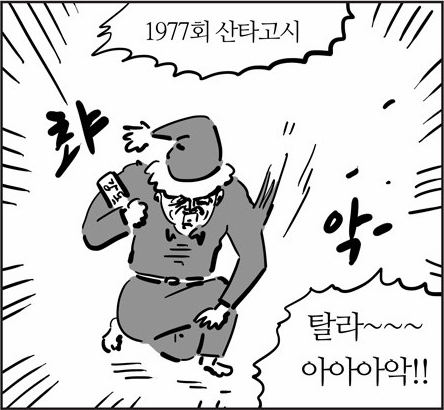

회 산타고시 리~ ~ ~ 탈라 아아아악!! 


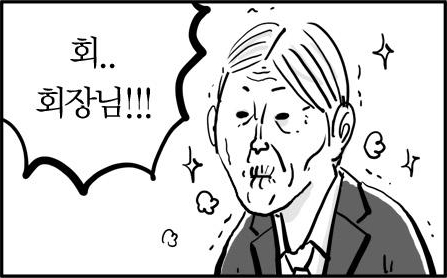

회 회장님!! 


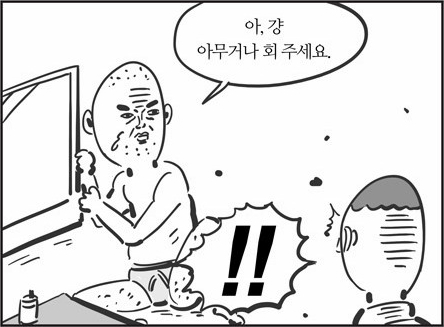

아걍 아무거나 회 주세요. 


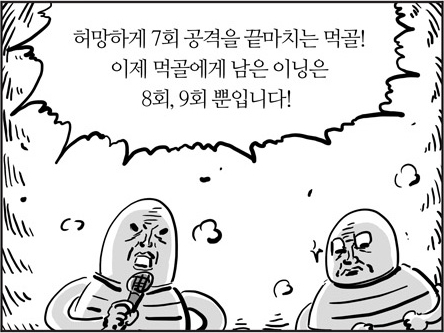

허망하게 회 공격을 끝마치는 먹골! 이제 먹골에게 남은 이닝은 회 회 뿐입니다! 


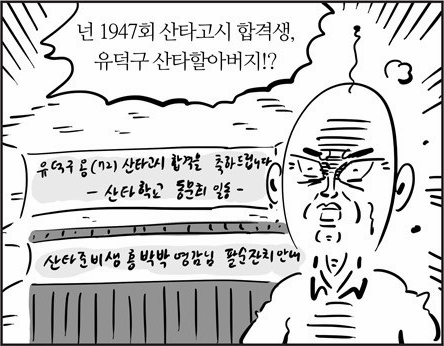

넌 회 산타고시 합격생 유덕구 산타할아버지? 


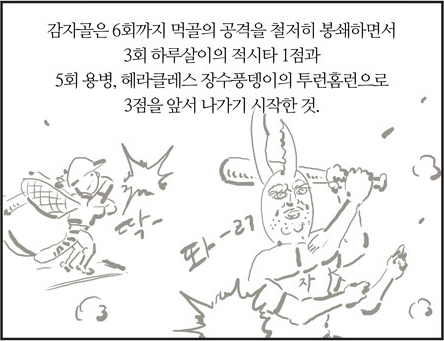

감자골은 회까지 먹골의 공격을 철저히 봉쇄하면서 회 하루살이의 적시타 점과 회 용병 헤라클레스 장수풍뎅이의 투런홈런으로 점을 앞서 나가기 시작한 것. 


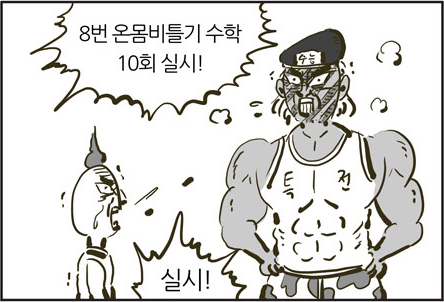

번 온몸비틀기 수학 회 실시! 수 


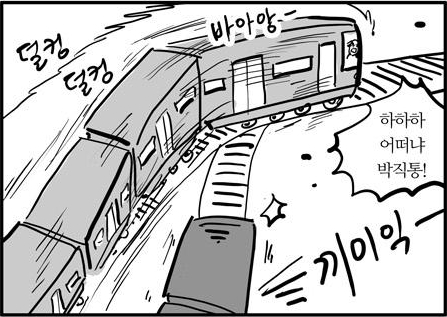

아아 덜컹 하하하 어떠냐 박직통! 이익 


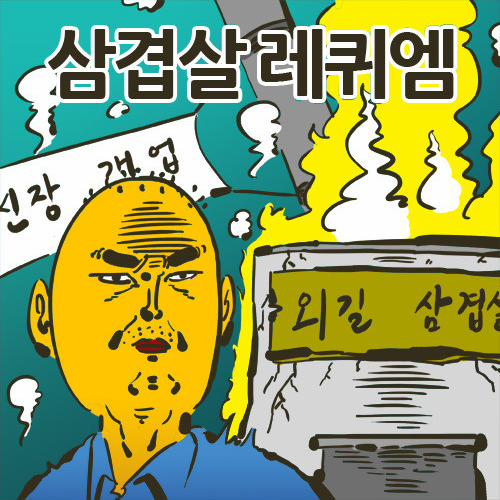

삼겹살 레퀴엠 


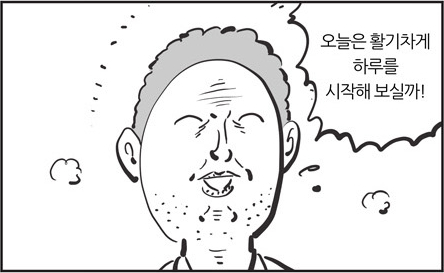

오늘은 활기차게 하루를 시작해 보실까! 


In [97]:
q_s = '회'
#q_s = (qs+' ')*55
print(q_s)
#st_vec = bc.encode([q_s])

st_vec = model.embed_sentence(q_s)
if(np.any(st_vec)):
  #print(st_vec)
  your_word_vector = np.array(st_vec[0], dtype=np.float32)
  m_sim = gensim_w2v.similar_by_vector(your_word_vector)
  print(m_sim)
  for i in m_sim:
    print_pic_sent(picpath,xmlpath,i[0])

In [12]:
np.shape(st_vec[0])

(1536,)

In [32]:
st_vec = bc.encode(['man walks to the door', 'he is closing to the end of his life'])
co_sim(st_vec[0], st_vec[1])

0.9057429